<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Metals_and_Mining_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset_path = '/content/drive/MyDrive/DATA 606 Capstone/Dataset/Merged Data'

In [5]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Metals_and_Mining.csv")

In [6]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19911 entries, 0 to 19910
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                19911 non-null  object 
 1   Symbol              19911 non-null  object 
 2   Series              19911 non-null  object 
 3   Prev Close          19911 non-null  float64
 4   Open                19911 non-null  float64
 5   High                19911 non-null  float64
 6   Low                 19911 non-null  float64
 7   Last                19911 non-null  float64
 8   Close               19911 non-null  float64
 9   VWAP                19911 non-null  float64
 10  Volume              19911 non-null  int64  
 11  Turnover            19911 non-null  float64
 12  Trades              9824 non-null   float64
 13  Deliverable Volume  18359 non-null  float64
 14  %Deliverble         18359 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 2.3

In [7]:
# Summary statistics of the dataset
print(sector_data.describe())

         Prev Close          Open          High           Low          Last  \
count  19911.000000  19911.000000  19911.000000  19911.000000  19911.000000   
mean     457.976968    458.718743    467.747755    449.042738    457.974092   
std      473.669220    474.518612    485.399684    462.927586    473.580319   
min       10.000000     37.000000     38.400000     36.750000     37.500000   
25%      165.800000    166.200000    169.600000    162.400000    166.000000   
50%      295.000000    295.750000    300.900000    289.300000    295.000000   
75%      611.500000    612.000000    624.000000    600.225000    611.650000   
max     4344.200000   4400.000000   4400.000000   4310.000000   4355.000000   

              Close          VWAP        Volume      Turnover         Trades  \
count  19911.000000  19911.000000  1.991100e+04  1.991100e+04    9824.000000   
mean     458.042258    458.643077  5.458395e+06  1.542655e+14   64889.481372   
std      473.663862    474.645169  7.129791e+06 

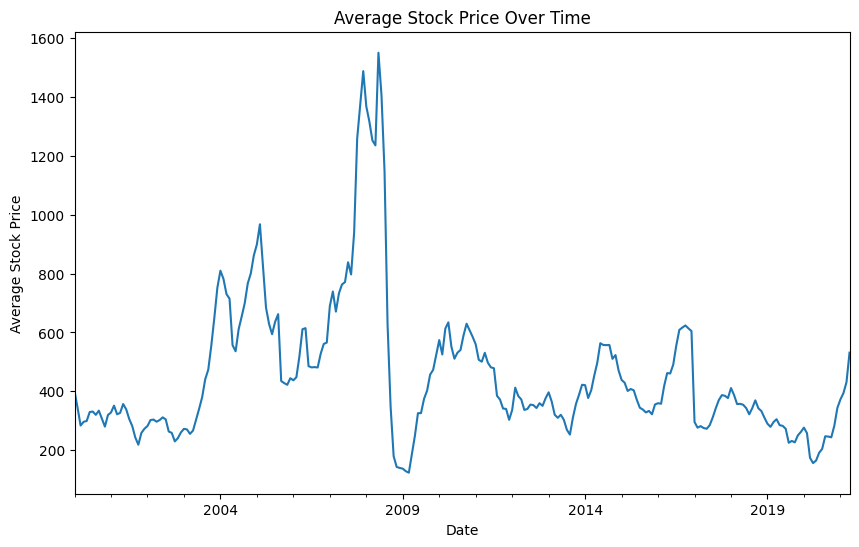

In [8]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

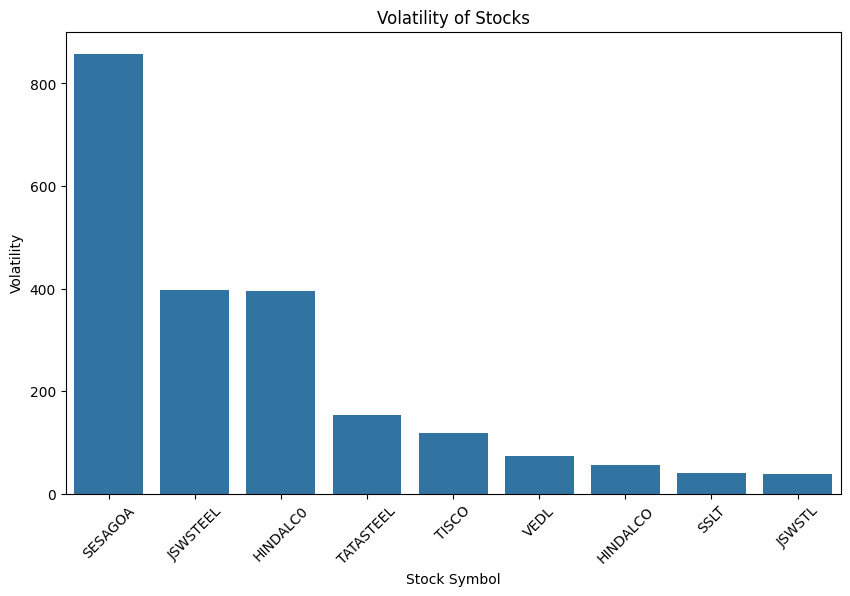

In [9]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

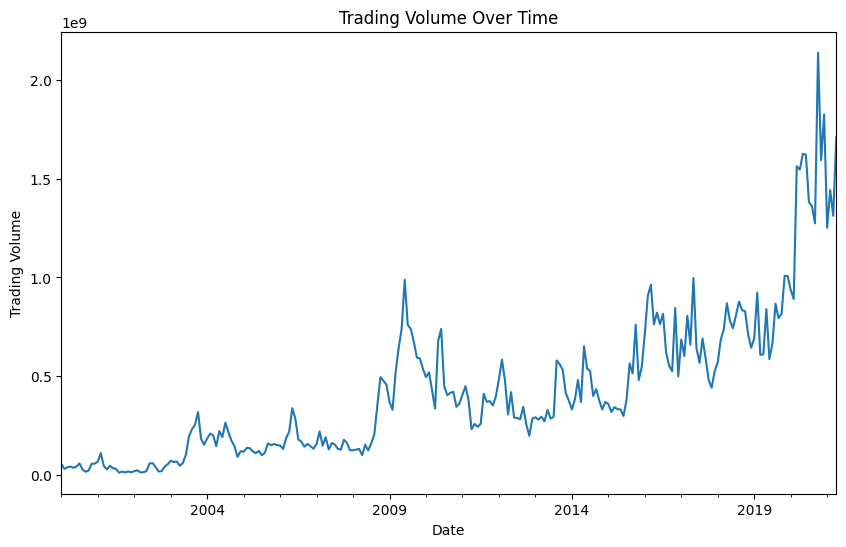

In [10]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


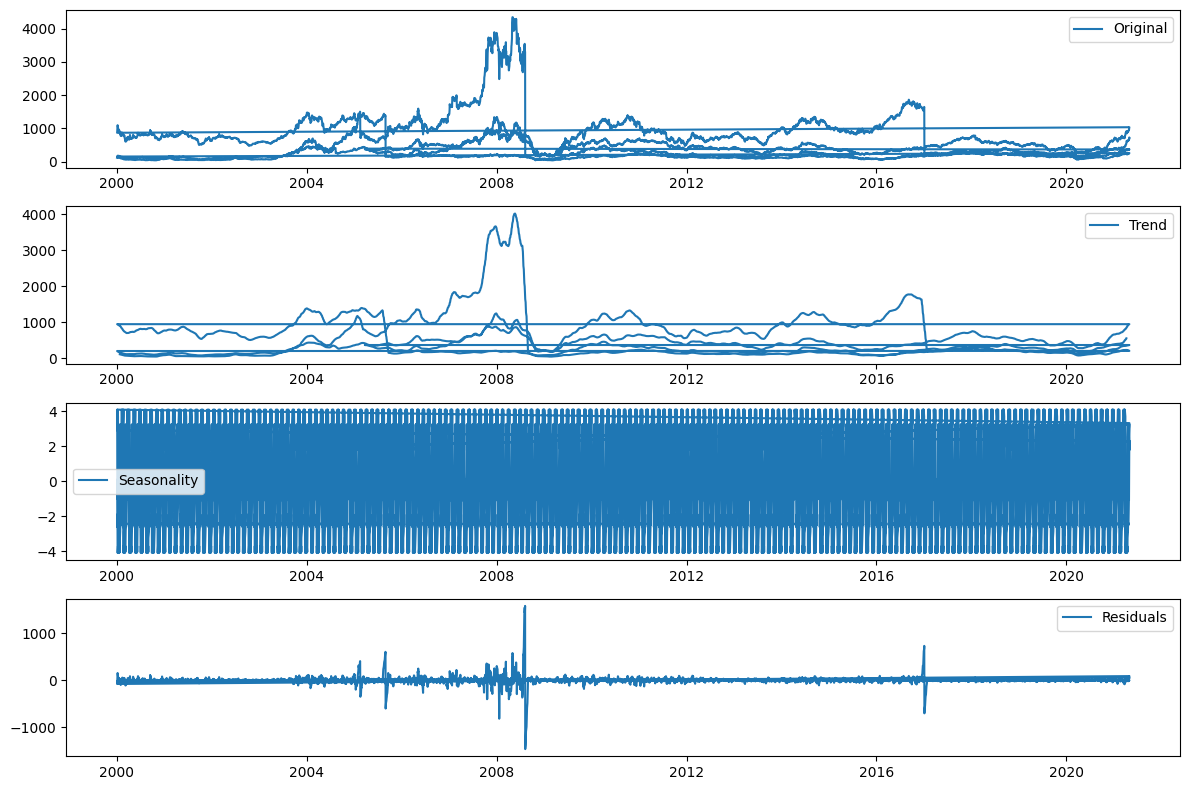

In [11]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

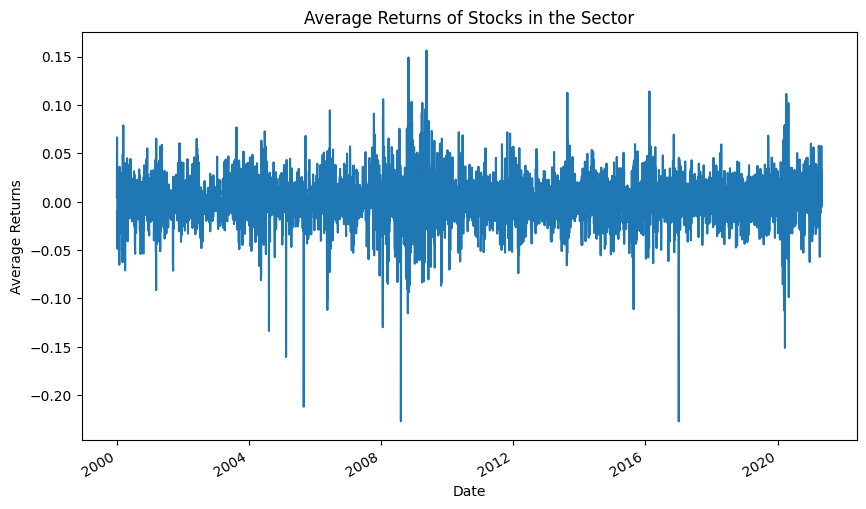

In [12]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()